In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [3]:
#Read into the Ford csv file
df = pd.read_csv('Ford_stocks.csv', parse_dates = ['Date'])
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     1972-06-01   0.000000   2.173495   2.149165   2.153220   0.115848   
1     1972-06-02   2.153220   2.173495   2.141055   2.149165   0.115630   
2     1972-06-05   2.149165   2.169440   2.141055   2.149165   0.115630   
3     1972-06-06   2.149165   2.157275   2.116725   2.124835   0.114321   
4     1972-06-07   2.124835   2.137000   2.112670   2.112670   0.113666   
...          ...        ...        ...        ...        ...        ...   
12558 2022-03-18  16.420000  16.900000  16.280001  16.860001  16.860001   
12559 2022-03-21  16.870001  17.110001  16.330000  16.480000  16.480000   
12560 2022-03-22  16.719999  17.309999  16.700001  17.090000  17.090000   
12561 2022-03-23  16.820000  17.049999  16.570000  16.680000  16.680000   
12562 2022-03-24  16.740000  16.980000  16.639999  16.830000  16.830000   

         Volume  
0       1091238  
1       1174468  
2       5209582  
3       1424158  
4        

In [4]:
#Trim the data down to only Date and Close columns and a timeframe of 5 years
df_trim = df.drop(columns=['Open','High','Low','Volume'])
start = (np.where(df['Date'] == dt.datetime(2015, 1, 2))[0])[0]
start
end = (np.where(df['Date'] == dt.datetime(2019, 12, 31))[0])[0]+1
df_trim = df_trim[start:end]
print(df_trim)

            Date  Close  Adj Close
10743 2015-01-02  15.36  11.553761
10744 2015-01-05  14.76  11.102441
10745 2015-01-06  14.62  10.997135
10746 2015-01-07  15.04  11.313057
10747 2015-01-08  15.42  11.598891
...          ...    ...        ...
11996 2019-12-24   9.47   9.217597
11997 2019-12-26   9.45   9.198130
11998 2019-12-27   9.36   9.110528
11999 2019-12-30   9.25   9.003460
12000 2019-12-31   9.30   9.052128

[1258 rows x 3 columns]


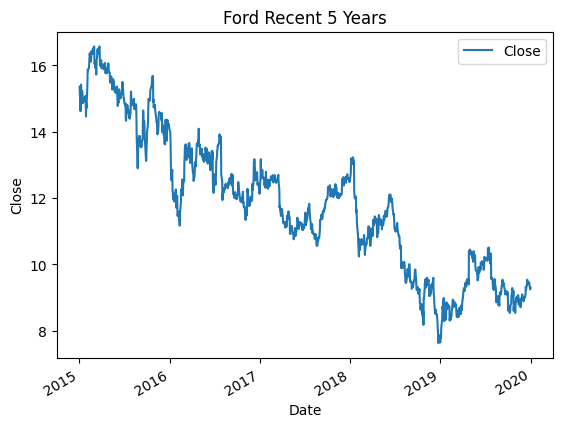

In [6]:
#Plot the trimmed data
df_trim.plot(title= 'Ford Recent 5 Years', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.savefig('Ford5Years.png')
plt.show()

In [7]:
#Create a new column for the Daily Percent Change throughout the 5 years
df_trim['Daily Percent Change'] = df['Close'].pct_change()
print(df_trim)

            Date  Close  Adj Close  Daily Percent Change
10743 2015-01-02  15.36  11.553761             -0.009032
10744 2015-01-05  14.76  11.102441             -0.039062
10745 2015-01-06  14.62  10.997135             -0.009485
10746 2015-01-07  15.04  11.313057              0.028728
10747 2015-01-08  15.42  11.598891              0.025266
...          ...    ...        ...                   ...
11996 2019-12-24   9.47   9.217597              0.003178
11997 2019-12-26   9.45   9.198130             -0.002112
11998 2019-12-27   9.36   9.110528             -0.009524
11999 2019-12-30   9.25   9.003460             -0.011752
12000 2019-12-31   9.30   9.052128              0.005405

[1258 rows x 4 columns]


In [8]:
#Create new dataframes for each quarter of the year
df_trim_Q = df_trim
df_trim_Q['Quarter'] = df_trim['Date'].dt.quarter
df_trim_Q1s = df_trim_Q[df_trim_Q['Quarter'] == 1]
print(df_trim_Q1s)

df_trim_Q2s = df_trim_Q[df_trim_Q['Quarter'] == 2]
print(df_trim_Q2s)

df_trim_Q3s = df_trim_Q[df_trim_Q['Quarter'] == 3]
print(df_trim_Q3s)

df_trim_Q4s = df_trim_Q[df_trim_Q['Quarter'] == 4]
print(df_trim_Q4s)

            Date  Close  Adj Close  Daily Percent Change  Quarter
10743 2015-01-02  15.36  11.553761             -0.009032        1
10744 2015-01-05  14.76  11.102441             -0.039062        1
10745 2015-01-06  14.62  10.997135             -0.009485        1
10746 2015-01-07  15.04  11.313057              0.028728        1
10747 2015-01-08  15.42  11.598891              0.025266        1
...          ...    ...        ...                   ...      ...
11805 2019-03-25   8.51   7.902812             -0.003513        1
11806 2019-03-26   8.76   8.134974              0.029377        1
11807 2019-03-27   8.62   8.004963             -0.015982        1
11808 2019-03-28   8.77   8.144261              0.017401        1
11809 2019-03-29   8.78   8.153547              0.001140        1

[306 rows x 5 columns]
            Date      Close  Adj Close  Daily Percent Change  Quarter
10804 2015-04-01  15.910000  12.089586             -0.014250        2
10805 2015-04-02  16.030001  12.180772      

In [9]:
#Get the P-Value of the first quarters
tstatQ1, pvalueQ1 = stats.ttest_ind(df_trim_Q1s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ1)

0.7238347669710509


In [10]:
#P-Values for 2nd, 3rd, and 4th quarters
tstatQ2, pvalueQ2 = stats.ttest_ind(df_trim_Q2s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ2)

tstatQ3, pvalueQ3 = stats.ttest_ind(df_trim_Q3s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ3)

tstatQ4, pvalueQ4 = stats.ttest_ind(df_trim_Q4s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ4)

0.769591934463981
0.43568148284628405
0.8968190580723008


In [11]:
#Create a new dataframe called df_QGroup with time period, average daily percent change and p-value difference from overall
df_QGroup = pd.DataFrame({"Time Period": ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4", "Overall"],
                          "Average Daily Percent Change": [df_trim_Q1s['Daily Percent Change'].mean(),
                                                           df_trim_Q2s['Daily Percent Change'].mean(),
                                                           df_trim_Q3s['Daily Percent Change'].mean(),
                                                           df_trim_Q4s['Daily Percent Change'].mean(),
                                                           df_trim['Daily Percent Change'].mean()],
                          "p-value difference from overall": [pvalueQ1, pvalueQ2, pvalueQ3, pvalueQ4, None]},
                         index = ["1", "2", "3", "4", "5"])
print(df_QGroup)

  Time Period  Average Daily Percent Change  p-value difference from overall
1   Quarter 1                      0.000074                         0.723835
2   Quarter 2                     -0.000007                         0.769592
3   Quarter 3                     -0.001036                         0.435681
4   Quarter 4                     -0.000159                         0.896819
5     Overall                     -0.000286                              NaN


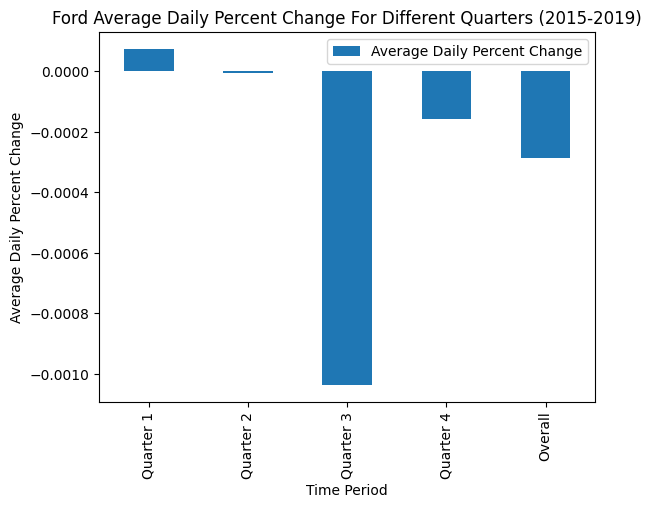

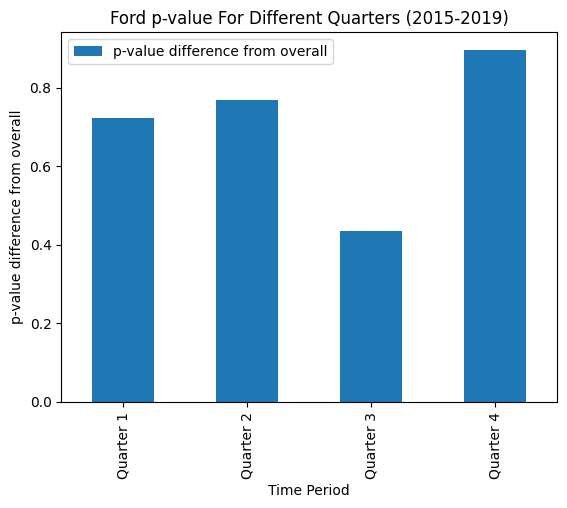

In [12]:
#Plot the average daily percent change and another graph for the P-Values
df_QGroup.plot(title= 'Ford Average Daily Percent Change For Different Quarters (2015-2019)',x='Time Period', y='Average Daily Percent Change', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Average Daily Percent Change')
plt.savefig('FordAverageDailyPercentChangeForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

df_QGroup[0:4].plot(title= 'Ford p-value For Different Quarters (2015-2019)',x='Time Period', y='p-value difference from overall', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('p-value difference from overall')
plt.savefig('FordP-ValueForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

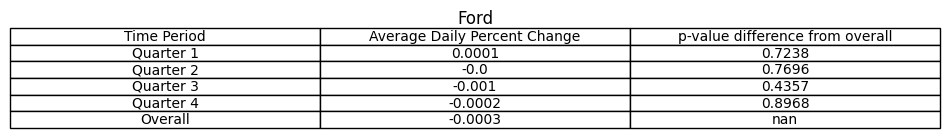

In [14]:
#Table of the new dataframe "df_QGroup"
plt.figure(figsize=(12,1.2))
plt.table(cellText=df_QGroup.round(4).values, colLabels=df_QGroup.columns, loc = 'center', cellLoc= 'center')
plt.title('Ford')
plt.axis('off')
plt.savefig('FordTable.png', bbox_inches = "tight")
plt.show()